In [ ]:
pip install control

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *

In [ ]:
numerator = [4,2];
denominator = [1,2,3];
W = tf(numerator,denominator)

In [ ]:
W

TransferFunction(array([4, 2]), array([1, 2, 3]))

In [ ]:
""" Найдем полюса и нули передаточной функции с использованием команд pole, zero"""
print('Передаточная функция САУ : \n %s'%W)
print("Полюса: \n %s"%pole(W))
print("Нули:\n %s -\n "%zero(W))

Передаточная функция САУ : 
 <TransferFunction>: sys[15]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   4 s + 2
-------------
s^2 + 2 s + 3

Полюса: 
 [-1.+1.41421356j -1.-1.41421356j]
Нули:
 [-0.5+0.j] -
 


Полюса меньше 0, система устойчева

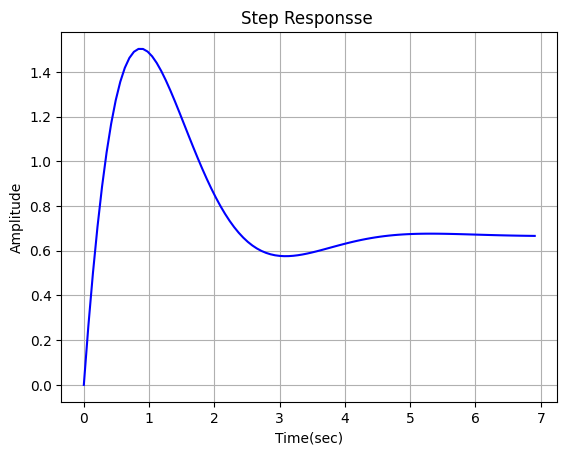

In [ ]:
# Переходная функция
y,x=step(W)
plt.plot(x,y,"b")
plt.title('Step Responsse ')
plt.ylabel('Amplitude')
plt.xlabel('Time(sec)')
plt.grid(True)
plt.show()

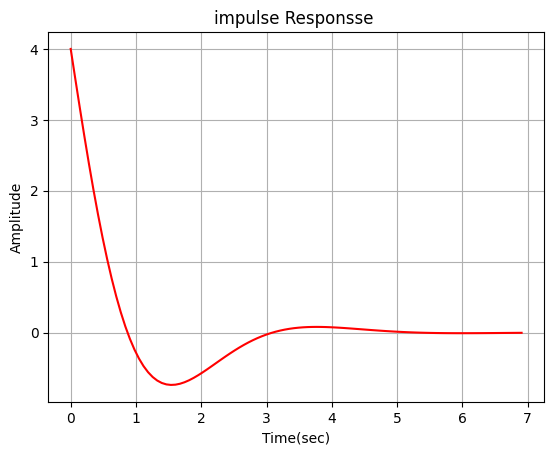

In [ ]:
# Импульсная переходная функция
y,x=impulse(W)
plt.plot(x,y,"r")
plt.title('impulse Responsse ')
plt.ylabel('Amplitude')
plt.xlabel('Time(sec)')
plt.grid(True)
plt.show()

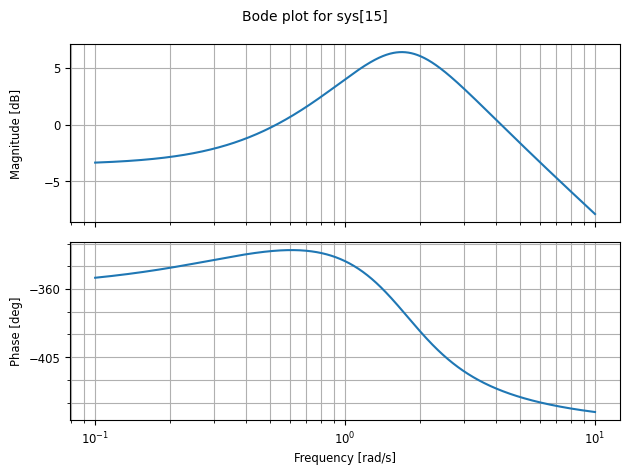

In [ ]:
# Диаграмма Боде
mag, phase, omega = bode(W, dB=True)
plt.plot()
plt.show()

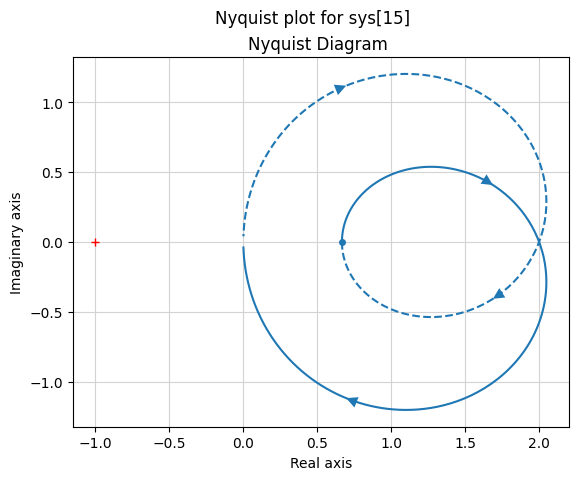

In [ ]:
# Частотный годограф Найквиста
plt.title('Nyquist Diagram ')
plt.ylabel('Imaginary Axis')
plt.xlabel('Real Axis')
nyquist(W)
plt.grid(True)
plt.plot()
plt.show()

Непрерывная модель: 
 <StateSpace>: sys[25]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[ 0.  1.]
     [-3. -2.]]

B = [[0.]
     [1.]]

C = [[4. 2.]]

D = [[0.]]

Передаточная функция: 
 <TransferFunction>: sys[26]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   2 s + 4
-------------
s^2 + 2 s + 3



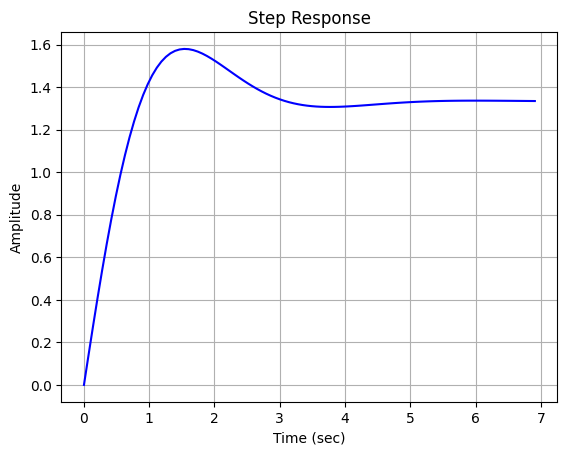

Дискретная модель: 
 <StateSpace>: sys[25]$sampled
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[ 0.98598655  0.09018243]
     [-0.27054729  0.80562168]]

B = [[0.00467115]
     [0.09018243]]

C = [[4. 2.]]

D = [[0.]]

dt = 0.1



In [ ]:
# Определение матриц системы
A = np.matrix([[0, 1], [-3, -2]])
B = np.matrix([[0], [1]])
C = np.matrix([[4, 2]])
D = 0

# Создание модели состояния
sn = ss(A, B, C, D)
wd = tf(sn)

# Вывод непрерывной модели и передаточной функции
print("Непрерывная модель: \n", sn)
print("Передаточная функция: \n", wd)

# Переходная функция
y, x = step(wd)
plt.plot(x, y, "b")
plt.title('Step Response')
plt.ylabel('Amplitude')
plt.xlabel('Time (sec)')
plt.grid(True)
plt.show()

# Преобразование в дискретную модель с шагом дискретизации h = 0.1
h = 0.1
sd = c2d(sn, h)
print("Дискретная модель: \n", sd)

In [ ]:
from control.matlab import *

# Проверка управляемости
controllability_matrix = ctrb(A, B)
rank_controllability = np.linalg.matrix_rank(controllability_matrix)
is_controllable = rank_controllability == A.shape[0]

# Проверка наблюдаемости
observability_matrix = obsv(A, C)
rank_observability = np.linalg.matrix_rank(observability_matrix)
is_observable = rank_observability == A.shape[0]

# Вывод результатов
print("Матрица управляемости:")
print(controllability_matrix)
print(f"Ранг матрицы управляемости: {rank_controllability}")
print(f"Система управляемая: {is_controllable}")

print("\nМатрица наблюдаемости:")
print(observability_matrix)
print(f"Ранг матрицы наблюдаемости: {rank_observability}")
print(f"Система наблюдаемая: {is_observable}")


Матрица управляемости:
[[ 0.  1.]
 [ 1. -2.]]
Ранг матрицы управляемости: 2
Система управляемая: True

Матрица наблюдаемости:
[[ 4.  2.]
 [-6.  0.]]
Ранг матрицы наблюдаемости: 2
Система наблюдаемая: True


Полюсы дискретной системы: [0.89580411+0.12753722j 0.89580411-0.12753722j]
Дискретная система устойчива: True


<ipython-input-26-8cea1ca5c3ac>:15: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(T, yout, use_line_collection=True)


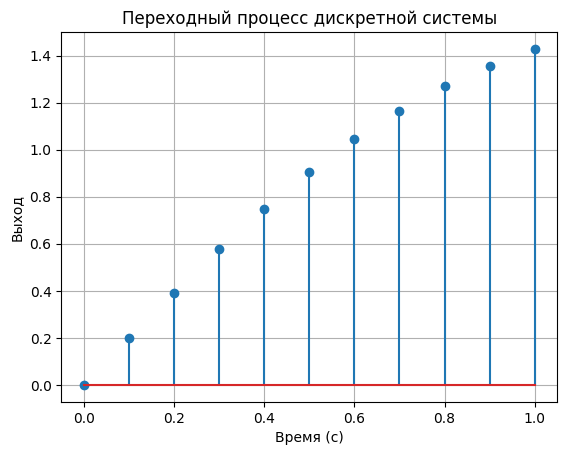

In [ ]:
import control as ctrl

# Преобразование дискретной передаточной функции в состояние
Gd_ss = ctrl.ss(sd)

# Оценка устойчивости дискретной системы
poles_d = np.linalg.eigvals(sd.A)
print("Полюсы дискретной системы:", poles_d)
print("Дискретная система устойчива:", np.all(np.abs(poles_d) < 1))

# Переходный процесс дискретной системы
T = np.arange(0, 1 + 0.1, 0.1)
_, yout = ctrl.forced_response(sd, T, np.ones_like(T))
plt.figure()
plt.stem(T, yout, use_line_collection=True)
plt.title('Переходный процесс дискретной системы')
plt.xlabel('Время (с)')
plt.ylabel('Выход')
plt.grid()
plt.show()